In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


df = pd.DataFrame({
    'Income': [15000, 1800, 120000, 10000],
    'Age': [25, 18, 42, 51],
    'Department': ['HR','Legal','Marketing','Management']
})
df

,Income,Age,Department
0,15000,25,HR
1,1800,18,Legal
2,120000,42,Marketing
3,10000,51,Management


In [3]:
df_scaled = df.copy()
col_names = ['Income', 'Age']
features = df_scaled[col_names]

## MinMax Scaler

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_scaled[col_names] = scaler.fit_transform(features.values)
df_scaled

,Income,Age,Department
0,0.111675,0.212121,HR
1,0.000000,0.000000,Legal
2,1.000000,0.727273,Marketing
3,0.069374,1.000000,Management


The minimum value among the columns became 0, and the maximum value was changed to 1, with other values in between. 
However, suppose we don’t want the income or age to have values like 0. 
Let us take the range to be (5, 10)

In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(5, 10))

df_scaled[col_names] = scaler.fit_transform(features.values)
df_scaled


,Income,Age,Department
0,5.558376,6.060606,HR
1,5.000000,5.000000,Legal
2,10.000000,8.636364,Marketing
3,5.346870,10.000000,Management


# Altered!!

# Standard Scaler

In [13]:
df_scaled = df.copy()
col_names = ['Income', 'Age']
features = df_scaled[col_names]

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df_scaled[col_names] = scaler.fit_transform(features.values)
df_scaled

,Income,Age,Department
0,-0.449056,-0.685248,HR
1,-0.722214,-1.218219,Legal
2,1.723796,0.609110,Marketing
3,-0.552525,1.294358,Management


# MaxAbsScaler

MaxAbs scaler takes the absolute maximum value of each column and divides each value in the column by the maximum value

Thus, it first takes the absolute value of each value in the column and then takes the maximum value out of those. 
This operation scales the data between the range [-1, 1].  
To see how it works, we will add another column called ‘Balance” which contains negative values:

In [18]:
df["Balance"] = [100.0, -263.0, 2000.0, -5.0]
df_scaled = df.copy()
col_names = ['Income', 'Age']
features = df_scaled[col_names]

from sklearn.preprocessing import MaxAbsScaler
scaler = MaxAbsScaler()

df_scaled[col_names] = scaler.fit_transform(features.values)
df_scaled

,Income,Age,Department,Balance
0,0.125000,0.490196,HR,100.0
1,0.015000,0.352941,Legal,-263.0
2,1.000000,0.823529,Marketing,2000.0
3,0.083333,1.000000,Management,-5.0


# Robust Scaler

If you have noticed in the scalers we used so far, each of them was using values like the mean, maximum and minimum values of the columns.
All these values are sensitive to outliers. 

If there are too many outliers in the data, they will influence the mean and the max value or the min value. 

Thus, even if we scale this data using the above methods, we cannot guarantee a balanced data with a normal distribution.

The Robust Scaler, as the name suggests is not sensitive to outliers. This scaler-

removes the median from the data
scales the data by the InterQuartile Range(IQR)


x_scaled = (x – Q1)/IQR

Where IQR = IQR = Q3 – Q1

In [27]:
df_scaled = df.copy()
col_names = ['Income', 'Age']
features = df_scaled[col_names]

from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

df_scaled[col_names] = scaler.fit_transform(features.values)
df_scaled

,Income,Age,Department
0,0.075075,-0.404762,HR
1,-0.321321,-0.738095,Legal
2,3.228228,0.404762,Marketing
3,-0.075075,0.833333,Management


# Quantile Transformer Scaler

Quantile Transformer Scaler converts the variable distribution to a normal distribution and scales it accordingly. 

Since it makes the variable normally distributed, it also deals with the outliers. 

1. It computes the cumulative distribution function (cdf) of the variable
2. It uses this cdf to map the values to a normal distribution
3. Maps the obtained values to the desired output distribution using the associated quantile function

A caveat to keep in mind though: Since this scaler changes the very distribution of the variables, 
linear relationships among variables may be destroyed by using this scaler. 

Thus, it is best to use this for non-linear data.

In [28]:
from sklearn.preprocessing import QuantileTransformer
scaler = QuantileTransformer()

df_scaled[col_names] = scaler.fit_transform(features.values)
df_scaled

/home/bcy/.local/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:2663: UserWarning: n_quantiles (1000) is greater than the total number of samples (4). n_quantiles is set to n_samples.
  warnings.warn(


,Income,Age,Department
0,0.666667,0.333333,HR
1,0.000000,0.000000,Legal
2,1.000000,0.666667,Marketing
3,0.333333,1.000000,Management


<AxesSubplot: ylabel='Frequency'>

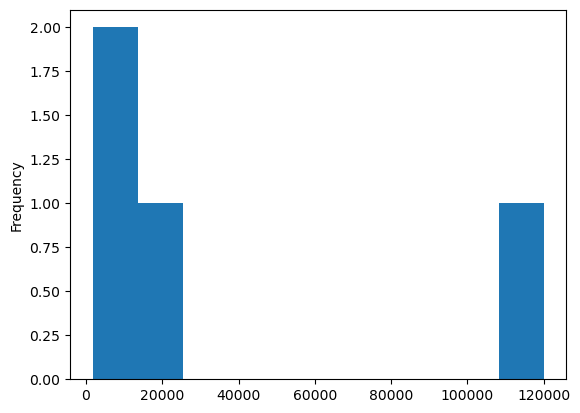

In [50]:
df['Income'].plot.hist()

<AxesSubplot: ylabel='Frequency'>

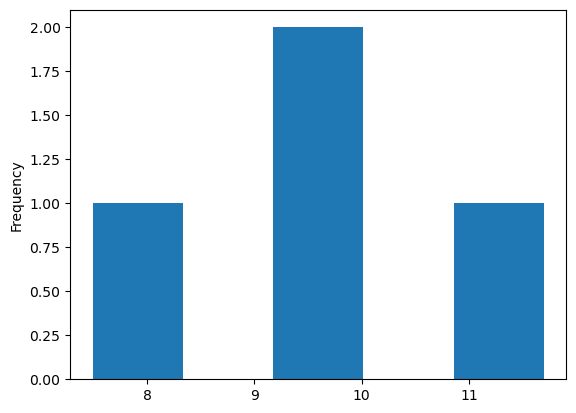

In [54]:
df['log_income'] = np.log(df['Income'])
df['log_income'].plot.hist(bins = 5)

# Power Transformer Scaler

In [55]:
#In our case, we will use the Box-Cox transform since all our values are positive.

from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method = 'box-cox')

'''
parameters:
method = 'box-cox' or 'yeo-johnson'
'''

df_scaled[col_names] = scaler.fit_transform(features.values)
df_scaled

,Income,Age,Department
0,0.125158,-0.597385,HR
1,-1.395497,-1.301984,Legal
2,1.419403,0.681202,Marketing
3,-0.149064,1.218168,Management


# Unit Vector Scaler/Normalizer

Normalization is the process of scaling individual samples to have unit norm. 

The most interesting part is that unlike the other scalers which work on the individual column values, 
the Normalizer works on the rows!!!!!!!!!!! 

Each row of the dataframe with at least one non-zero component is rescaled independently of other samples so that 
its norm (l1, l2, or inf) equals one.

Just like MinMax Scaler, the Normalizer also converts the values between 0 and 1, and between -1 to 1 when there are negative values
in our data.

However, there is a difference in the way it does so.

If we are using L1 norm, the values in each column are converted so that the sum of their absolute values along the row = 1
If we are using L2 norm, the values in each column are first squared and added so that the sum of their absolute values along the row = 1

In [59]:
from sklearn.preprocessing import Normalizer
scaler = Normalizer(norm = 'l2')
# norm = 'l2' is default

df_scaled[col_names] = scaler.fit_transform(features.values)
df_scaled

,Income,Age,Department
0,0.999999,0.001667,HR
1,0.999950,0.010000,Legal
2,1.000000,0.000350,Marketing
3,0.999987,0.005100,Management


Thus, if you check the first row,

(.999999)^2 + (0.001667)^2 = 1.000(approx)

Similarly, you can check for all rows, and try out the above with norm = ‘l1’ as well.

# Custom Transformer

We can write our own Python function to transform the data